<a href="https://colab.research.google.com/github/AzzzyD/AzzzyD/blob/main/DAB311_LAB5_Azhar_0855807.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import sys
import os
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers

# Force TensorFlow to use only the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Print versions
print("Python version:", sys.version)
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)
print("Numpy version:", np.__version__)

Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
TensorFlow version: 2.17.0
Keras version: 3.4.1
Numpy version: 1.26.4


# A Simple Deep Learning Model for Text Classification
## Loading the IMDB Dataset

In [2]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

word_index = imdb.get_word_index() # word_index is a dictionary mapping words to an integer index
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

# Decode the review
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print("Decoded Review:", decoded_review)
print("Label:", train_labels[0])


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Decoded Review: ? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big p

Import the IMDB dataset with movie reviews and their sentiment labels.

The dataset is restricted to the 10,000 most commonly used words with num_words=10000.

The reverse_word_index makes it possible to translate reviews back into understandable text.

# Preparing the Data
## Encoding integer sequences into a binary matrix

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0 # set specific indices of results[i] to 1s
    return results

x_train = vectorize_sequences(train_data) # vectorized training data
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels, dtype='float32') # vectorized labels
y_test = np.asarray(test_labels, dtype='float32')

print("Example of vectorized sequence length:", len(x_train[0]))
print("Vectorized sequence:", x_train[0])
print("Sum of unique elements in vectorized sequence:", sum(np.array(x_train[0]))) # should be equal to len(np.unique((np.array(train_data[0]))))


Example of vectorized sequence length: 10000
Vectorized sequence: [0. 1. 1. ... 0. 0. 0.]
Sum of unique elements in vectorized sequence: 120.0


vectorize_sequences function: Transforms integer lists into 2D float tensors.

Every review is converted into a vector containing 10,000 elements, where each index represents the existence of particular words.

Changing labels to float32 so they are compatible with TensorFlow.

# Building a Network

In [4]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

print(model.summary())

start = time.time()
model.fit(x_train, y_train, epochs=4, batch_size=512) # train the model in mini-batches of 512 samples
end = time.time()

print("\nTraining time:", np.round(end-start, 3))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         160,016 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7304 - loss: 0.5607
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9000 - loss: 0.2877
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9237 - loss: 0.2147
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9377 - loss: 0.1766

Training time: 8.371


Describes a basic neural network consisting of three layers: two hidden layers with 16 units each using ReLU activation, and an output layer with one unit using a sigmoid activation.

Make the model with rmsprop optimizer and binary_crossentropy loss function.

Displays the summary of the model to exhibit the structure.

Trains the model with the training data, while recording the duration.

# Testing the performance on a test set

In [5]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("test_loss: %s, test_accuracy: %s" %(np.round(test_loss,3), np.round(test_accuracy,3)))

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8815 - loss: 0.2918
test_loss: 0.292, test_accuracy: 0.884


# Generating predictions on the new dataset

In [6]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.14751954],
       [0.99980146],
       [0.5368166 ],
       ...,
       [0.07827527],
       [0.05957774],
       [0.48199293]], dtype=float32)

# Validating the Model
## Creating a validation set

In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Divides the data for training into a training subset and a validation subset.

Trains the model over 20 epochs, with performance monitored using the validation set.

# Training the model

In [8]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.7005 - loss: 0.5996 - val_accuracy: 0.8523 - val_loss: 0.4039
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.8900 - loss: 0.3333 - val_accuracy: 0.8806 - val_loss: 0.3110
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9209 - loss: 0.2388 - val_accuracy: 0.8893 - val_loss: 0.2808
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9381 - loss: 0.1891 - val_accuracy: 0.8878 - val_loss: 0.2778
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.9491 - loss: 0.1593 - val_accuracy: 0.8877 - val_loss: 0.2821
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9592 - loss: 0.1303 - val_accuracy: 0.8852 - val_loss: 0.2939
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9691 - loss: 0.1071 - val_accuracy: 0.8840 - val_loss: 0.3054
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9746 - loss: 0.0890 - val_accuracy: 0.8748 - v

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

# Plotting validation results

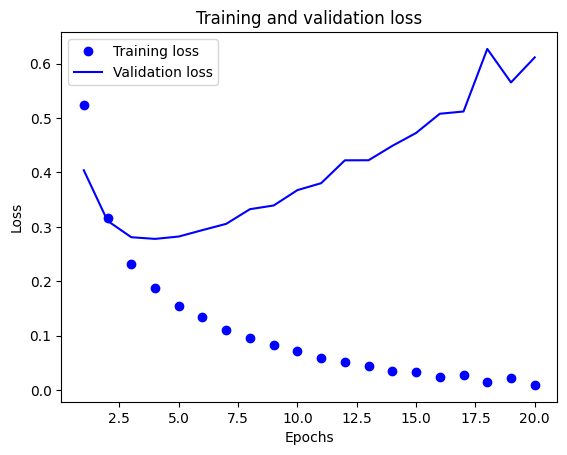

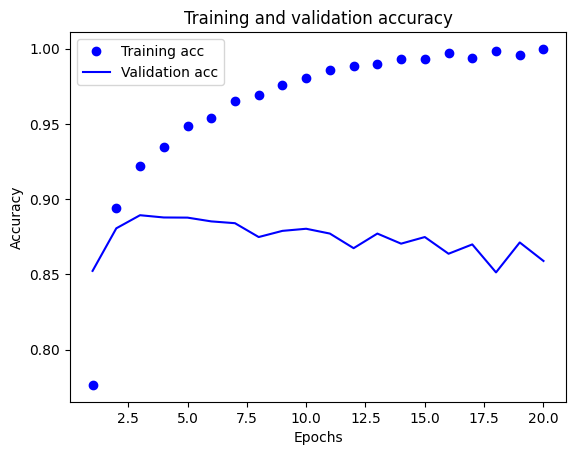

In [10]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Retrieve loss and accuracy values from the training data.

Shows model performance between training vs validation loss and accuracy across epochs to demonstrate how the model is performing.


# Investigating Overfitting Issues
## Regularization

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_regularized = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.6704 - loss: 0.6614 - val_accuracy: 0.8621 - val_loss: 0.4560
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - accuracy: 0.8812 - loss: 0.4015 - val_accuracy: 0.8678 - val_loss: 0.3837
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9139 - loss: 0.3083 - val_accuracy: 0.8869 - val_loss: 0.3385
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9349 - loss: 0.2561 - val_accuracy: 0.8882 - val_loss: 0.3313
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9450 - loss: 0.2295 - val_accuracy: 0.8832 - val_loss: 0.3401
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9506 - loss: 0.2116 - val_accuracy: 0.8814 - val_loss: 0.3518
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.9587 - loss: 0.1966 - val_accuracy: 0.8711 - val_loss: 0.3798
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9624 - loss: 0.1822 - val_accuracy: 0.8745 - v

Adds L2 regularization in the layers to make sure big weights are not included and avoid overfitting.

Trains the model while applying regularization.


# Plotting the impact of regularization


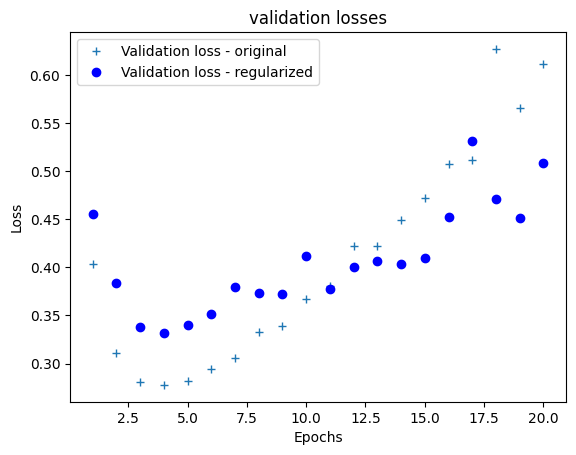

In [12]:
history_original_dict = history.history
history_regularized_dict = history_regularized.history

val_loss_values_original = history_original_dict['val_loss']
val_loss_values_regularization = history_regularized_dict['val_loss']

epochs = range(1, len(val_loss_values_original) + 1)

plt.plot(epochs, val_loss_values_original, '+', label='Validation loss - original')
plt.plot(epochs, val_loss_values_regularization, 'bo', label='Validation loss - regularized')
plt.title('validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Dropout

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_dropout = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - accuracy: 0.6071 - loss: 0.6527 - val_accuracy: 0.7838 - val_loss: 0.5393
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.7679 - loss: 0.5131 - val_accuracy: 0.8708 - val_loss: 0.3919
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.8258 - loss: 0.4257 - val_accuracy: 0.8794 - val_loss: 0.3369
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8738 - loss: 0.3554 - val_accuracy: 0.8882 - val_loss: 0.2958
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.8916 - loss: 0.3085 - val_accuracy: 0.8805 - val_loss: 0.3031
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9058 - loss: 0.2745 - val_accuracy: 0.8888 - val_loss: 0.2748
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.9228 - loss: 0.2395 - val_accuracy: 0.8855 - val_loss: 0.2933
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9334 - loss: 0.2087 - val_accuracy: 0.8865 - v

Integrates Dropout layers to randomly disable units during training to avoid overfitting.

Trains the model while incorporating dropout.

## Plotting the impact of dropout

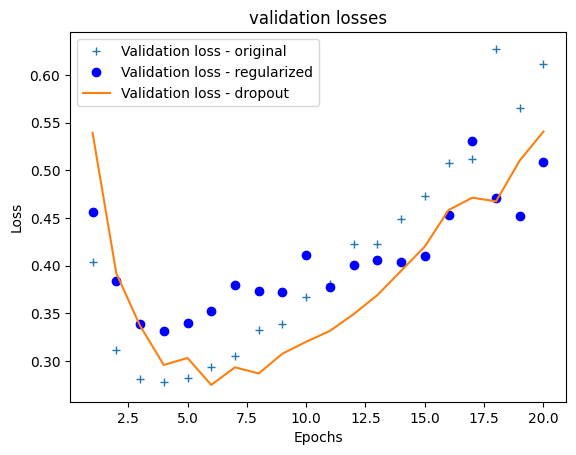

In [14]:
history_original_dict = history.history
history_regularized_dict = history_regularized.history
history_dropout_dict = history_dropout.history

val_loss_values_original = history_original_dict['val_loss']
val_loss_values_regularization = history_regularized_dict['val_loss']
val_loss_values_dropout = history_dropout_dict['val_loss']

epochs = range(1, len(val_loss_values_original) + 1)

plt.plot(epochs, val_loss_values_original, '+', label='Validation loss - original')
plt.plot(epochs, val_loss_values_regularization, 'bo', label='Validation loss - regularized')
plt.plot(epochs, val_loss_values_dropout, '-', label='Validation loss - dropout')
plt.title('validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Displays validation loss graphs for the initial model, the model with regularization, and the model with dropout.

Assists in illustrating how regularization and dropout can affect overfitting.

Explanation of the last viz

Explaining the curves -

Validation loss - original: This graph displays the validation loss of our initial model, without applying any regularization methods. We can observe how it begins to rise after approximately 10 epochs, suggesting that the model is beginning to overfit the training data.

Regularized validation loss: This graph reflects the model's performance with L2 regularization implemented. The stability of the curve indicates that regularization plays a role in managing loss growth and reducing overfitting.

Loss during validation tests with dropout: Initially it exhibits a higher value, yet gradually decreases throughout epochs. This model excels at minimizing validation loss, indicating that dropout effectively combats overfitting by randomly deactivating units while training.

What we understand:

Original Model: Indications of overfitting are present with the validation loss increasing after 10 epochs in the original model.

Regularization Model: Validation loss is more consistent, indicating that L2 regularization is assisting in mitigating overfitting.

Dropout Model: Achieving optimal results in validation loss, showing the high effectiveness of dropout in preventing overfitting.